# Data Science Bowl 2017: how to start the competition

Link to the competition: https://www.kaggle.com/c/data-science-bowl-2017


## Agenda

1. The Data Science Bowl 2017
2. System Setup
3. Get the data and initial analysis
4. Preprocessing steps and results
5. Outlook



## 1. The Data Science Bowl 2017
### What is the Data Science Bowl 2017

Lung cancer is one of the most common types of cancer, with nearly 225,000 new cases of the disease expected in the U.S. in 2016.

#### The Challange
- Data set of high-resolution scans of lungs
- Detect lesions in the lungs that are cancerous
- Develop an artificial intelligence algorithm to reduce the false positive rate

#### The Goal
- With a lower false positive rate the low-dose CT scans could be widely used for lung cancer detection
- Results have the potential to advance our understanding of how cancer develops 


### Scope of this years competition

The Sience Bowl this year is sponsored by Laura and John Arnold Foundation, National Cancer Institute, American College of Radiology, Amazon Web Services, NVIDIA and several other

- Global, web-based competition
- Open 90 days, from January 12 to April 12, 2017
- $1 million in prize money provided by the Laura and John Arnold Foundation

### Why Lung Cancer?
![alt text](pictures/lungCancerInfo.png)


- Lung cancer is one of the most common types of cancer, with nearly 225,000 new cases of the disease expected in the U.S. in 2016.
- It also accounts for $12 billion in health care costs in the U.S. every year.
- Early detection is critical to surviving lung cancer, as it opens a range of treatment options not available when cancer is detected at later, more advanced stages.

## 2. System Setup
### The Data
- Data size
 - 66GB zipped
 - ~140GB unzipped
- Data Format
 - CT scan data
 - .dcm files ( medical file format; use https://github.com/darcymason/pydicom )
- Structure
 - Each folder represents one patient
 - 130 - 280 slices per patient

In [1]:
ls "data/sample_2_patients/"

 Datentr„ger in Laufwerk C: ist OSDisk
 Volumeseriennummer: 3465-B012

 Verzeichnis von C:\Users\jonas.leininger\DataScienceBowl2017Meetup\data\sample_2_patients

08.03.2017  10:08    <DIR>          .
08.03.2017  10:08    <DIR>          ..
08.03.2017  10:08    <DIR>          00cba091fa4ad62cc3200a657aeb957e
08.03.2017  10:08    <DIR>          0a0c32c9e08cc2ea76a71649de56be6d
               0 Datei(en),              0 Bytes
               4 Verzeichnis(se), 75.297.976.320 Bytes frei


In [2]:
ls "data/sample_2_patients/00cba091fa4ad62cc3200a657aeb957e/" | head

 Datentr„ger in Laufwerk C: ist OSDisk
 Volumeseriennummer: 3465-B012

 Verzeichnis von C:\Users\jonas.leininger\DataScienceBowl2017Meetup\data\sample_2_patients\00cba091fa4ad62cc3200a657aeb957e

08.03.2017  10:08    <DIR>          .
08.03.2017  10:08    <DIR>          ..
08.03.2017  08:28           525.448 034673134cbef5ea15ff9e0c8090500a.dcm
08.03.2017  08:28           525.438 0484f5a7f55eb7b6743cadaffcce586d.dcm
08.03.2017  08:28           525.446 053a0460fb45227bd8e0e7b514a71e8e.dcm


Import pydicom to process the .dcm files
Documentation https://pydicom.readthedocs.io/en/stable/

In conda run the following command:

``` bash
conda install -c conda-forge pydicom
```

- Information
 - Image with gray scale values
 - Z-Position of the slice 
 - Resolution of images

### Which System to use?

- Unzipped data 140GB
 - After preprocessing at least same amount added
 - Minimum of ~300GB free disk space needed
- For the artificial neural network we need a GPU
 - Without a GPU learning and prediction time to long

#### Laptop
- No GPU
- Not enough free disk space

#### Cloud computing instances
- Number of GPUs and disk space is scalable

### Which cloud scientific computing to use?

- Amazon Web Services
 - Company likes to get experience with AWS
 - Fast search for tutorials results in a lot of information for AWS
 - AWS is one of the official partners for the competition

## 3. Get the Data and Initial Analysis
### Where and how to load the data

- Download via webbrowser ( ~0.5d-1.0d)
 - No additional setup
 - Browser needs to be open the whole time
- Download via Torrent ( ~4h-8h)
 - Much faster than download from kaggle.com
 - Easier to pause the download
- Download via Kaggle-CLI (~14h)
 - CLI to download data and upload submissions via console
 - Similar to wget in console but without –load-cookies
 - https://github.com/floydwch/kaggle-cli


### Loading data to an AWS s3 bucket
#### 1. Start with the cheapest ec2 instance with additional storage space (250GB+)
#### 2. Download data via kaggle-cli
Install kaggle-cli

```bash
pip install kaggle-cli
```

Configure the kaggle-cli
```bash
kg config -u `username` -p `password` -c `competition`
```

Download data with kg
```bash
kg download -f `train.zip`
```

#### 3. Load the data to an AWS s3 bucket
Install aws-cli
```bash
sudo pip install --upgrade awscli
```

Configure aws-cli
```bash
aws configure
```
AWS user ID and security key are needed.
Location of your s3 bucket, 'eu-central-1' for example (ec2 loactions are 'eu-central-1a', s3 buckets don't have the last letter)

```bash
aws s3 mb s3://wmc-kaggle-data-upload-dsb

aws s3api get-bucket-location --bucket bucketName

aws s3 cp --recursive stage1/ s3://bucketName/DataKaggle/RawData/

sudo apt-get install p7zip-full

7za e stage1.7z
```

### Take an initial look at the data

#### CT Data
- Stack of monochrome images
- Metadata: Technical and patient informations
- Illustration of volume: Pointcloud
- Usage of Hounsfield Units (HU)
 - Air: -1000 HU
 - Lung: -500 HU
 - Water: 0 HU
 - Bone: 500+ HU

![alt text](pictures/dcmData.png)

In [6]:
import dicom
import os

inputFolder = 'data/sample_2_patients'
patients = os.listdir(inputFolder)
patients.sort()

pathPatientZero = inputFolder + '/' + patients[0] + '/'
patientZero_Images = [dicom.read_file(pathPatientZero + file) for file in os.listdir(pathPatientZero)]

In [10]:
patientZero_Images[0]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.249139163741242644304020243485943527041
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0020) Patient ID                          LO: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.86208730140539712382771890501772734277950692397709007305473
(0020, 000e) Series Instance UID                 UI: 2.25.11575877329635228925808596800269974740893519451784626046614
(0020, 0011) Series Number                       IS: '3'
(0020, 0012) Acquisition Number            

In [11]:
print("Pixel array: ", patientZero_Images[0].pixel_array)
print("Pixel array shape: ",patientZero_Images[0].pixel_array.shape)
print("Scan position: ",patientZero_Images[0].ImagePositionPatient)
print("Scan location: ",patientZero_Images[0].SliceLocation)
print("Number of scans: ",len(patientZero_Images))

Pixel array:  [[-2000 -2000 -2000 ..., -2000 -2000 -2000]
 [-2000 -2000 -2000 ..., -2000 -2000 -2000]
 [-2000 -2000 -2000 ..., -2000 -2000 -2000]
 ..., 
 [-2000 -2000 -2000 ..., -2000 -2000 -2000]
 [-2000 -2000 -2000 ..., -2000 -2000 -2000]
 [-2000 -2000 -2000 ..., -2000 -2000 -2000]]
Pixel array shape:  (512, 512)
Scan position:  ['-145.500000', '-158.199997', '-316.200012']
Scan location:  -316.200012
Number of scans:  134


### 4. Preprocessing Steps and first Results
#### Data Preparation
- Preprocessing
- Segmentation
- Optimization

In [17]:
import numpy as np
import Preprocessing
import Segmentation
import Loader
import os
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral)
from skimage import measure
from skimage.segmentation import clear_border
from matplotlib import pyplot
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')

In [18]:
ctData = Preprocessing.load_scan(inputFolder + '/' + patients[0])
pixelValues = Preprocessing.get_pixels_hu(ctData)
resampled, spacing = Preprocessing.resample(pixelValues, ctData, [1, 1, 1])
print("Shape before resampling\t", pixelValues.shape)
print("Shape after resampling\t", resampled.shape)

In [19]:
pixelValues = Preprocessing.get_pixels_hu(ctData)

In [20]:
resampled, spacing = Preprocessing.resample(pixelValues, ctData, [1, 1, 1])

In [21]:
print("Shape before resampling\t", pixelValues.shape)
print("Shape after resampling\t", resampled.shape)

Shape before resampling	 (134, 512, 512)
Shape after resampling	 (335, 306, 306)


In [22]:
images = []
for i in range(len(patients)):
    ctData = Preprocessing.load_scan(inputFolder + '/' + patients[i])
    # Convert greyscale to Hounsfield Units (HU)
    pixelValues = Preprocessing.get_pixels_hu(ctData)
    # Resample voxels to 1x1x1 distance
    resampled, spacing = Preprocessing.resample(pixelValues, ctData, [1, 1, 1])
    print("Shape before resampling\t", pixelValues.shape)
    print("Shape after resampling\t", resampled.shape)
    images.append(resampled)
patientsCTData = np.array(images)

Shape before resampling	 (134, 512, 512)
Shape after resampling	 (335, 306, 306)
Shape before resampling	 (133, 512, 512)
Shape after resampling	 (332, 340, 340)


In [24]:
segmentedLungsWatershed= []
for i in range(len(patientsCTData)):
    patient = patientsCTData[i]
    rows, cols = patient[0].shape
    segmentedImages = np.empty((len(patient),rows, cols))
    for n in range(len(patient)):
        lungfilterArea, outline, watershedImage, sobelGradient, markerInternal, \
        markerExternal, markerWatershed = Segmentation.seperate_lungs(patientsCTData[i][n])
        segmentedLung = np.where(lungfilterArea == 1, patientsCTData[i][n], -2000)
        segmentedImages[n, :, :] = segmentedLung
    segmentedLungsWatershed.append(segmentedImages)

In [25]:
segmentedLungs3d = []
for i in range(len(patientsCTData)):
    segmentedImages = Segmentation.segment_lung_mask(patientsCTData[i])
    segmentedLungs3d.append(segmentedImages)

In [26]:
for i in range(len(segmentedLungs3d)):
    Loader.save_stack(segmentedLungs3d[i], ('data/Students_seg' + str(i)))
for i in range(len(segmentedLungsWatershed)):
    Loader.save_stack(segmentedLungsWatershed[i], ('data/Watershed_seg' + str(i)))

In [27]:
segmentedlung_student_pat0 = Loader.load_stack('data/Students_seg0.npy')
segmentedlung_watershed_pat0 = Loader.load_stack('data/Watershed_seg0.npy')

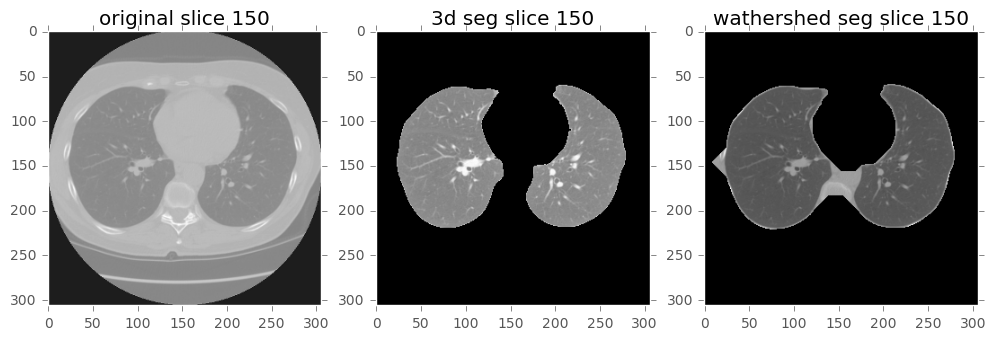

In [54]:
sliceNumber = 150
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(131, axisbg='white')
ax2 = fig.add_subplot(132, axisbg='white')
ax3 = fig.add_subplot(133, axisbg='white')

ax1.imshow(patientsCTData[0][sliceNumber], cmap='gray')
ax1.grid(b=True, which='major', color='b', linestyle='-', alpha=0)
ax1.set_title('original slice '+str(sliceNumber))
ax2.imshow(segmentedLungs3d[0][sliceNumber], cmap='gray')
ax2.grid(b=True, which='major', color='b', linestyle='-', alpha=0)
ax2.set_title('3d seg slice '+str(sliceNumber))
ax3.imshow(segmentedLungsWatershed[0][sliceNumber], cmap='gray')
ax3.grid(b=True, which='major', color='b', linestyle='-', alpha=0)
ax3.set_title('wathershed seg slice '+str(sliceNumber))

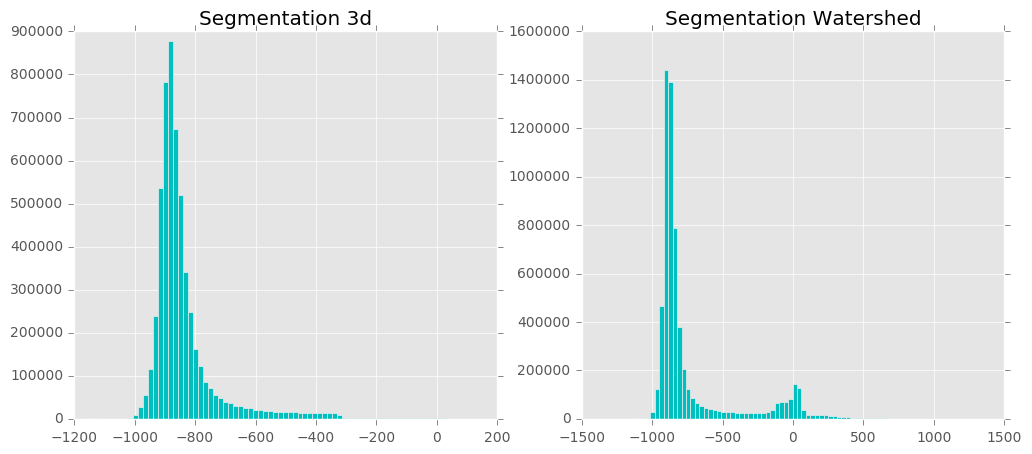

In [53]:
segmendedLungs3dHu = segmentedLungs3d[0][segmentedLungs3d[0]>-2000]
segmendedLungswaterHu = segmentedLungsWatershed[0][segmentedLungsWatershed[0]> -2000]
sliceNumber = 0
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(segmendedLungs3dHu, bins=80, color='c')
ax1.grid(b=True, which='major', color='w', linestyle='-')
ax1.set_title('Segmentation 3d')
ax2.hist(segmendedLungswaterHu, bins=80, color='c')
ax2.grid(b=True, which='major', color='w', linestyle='-')
ax2.set_title('Segmentation Watershed')

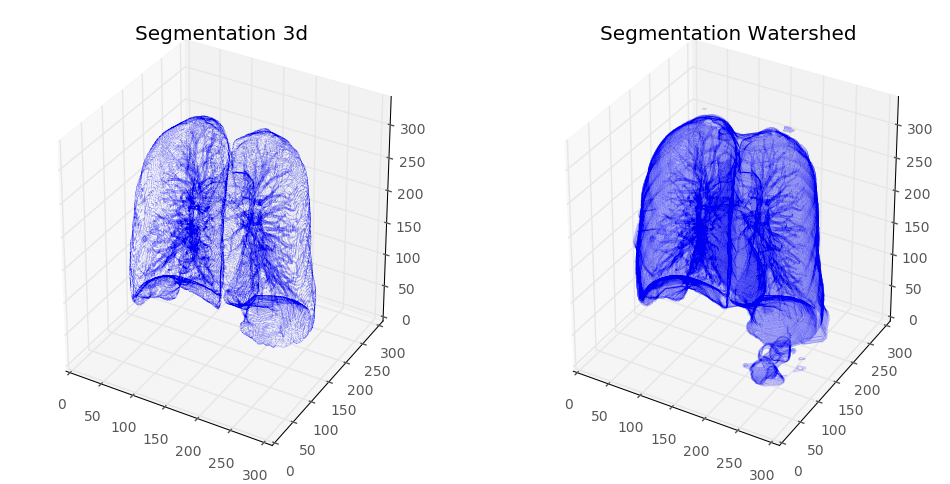

In [56]:
p = segmentedlung_student_pat0.transpose(2, 1, 0)
p2 = segmentedlung_watershed_pat0.transpose(2, 1, 0)
verts, faces = measure.marching_cubes(p, -500)
verts2, faces2 = measure.marching_cubes(p2, -500)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d', axisbg='white')
ax2 = fig.add_subplot(122, projection='3d', axisbg='white')
# mesh = Poly3DCollection(verts[faces], facecolors='blue', linewidths=1, alpha=0.1)
# ax.add_collection3d(mesh)
ax.add_collection3d(Line3DCollection(verts[faces], colors='blue', linewidths=0.1, linestyles=':', alpha=0.1))
ax.set_xlim(0, p.shape[0])
ax.set_ylim(0, p.shape[1])
ax.set_zlim(0, p.shape[2])
ax.set_title('Segmentation 3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax2.add_collection3d(Line3DCollection(verts2[faces2], colors='blue', linewidths=0.1, linestyles=':', alpha=0.1))
ax2.set_xlim(0, p2.shape[0])
ax2.set_ylim(0, p2.shape[1])
ax2.set_zlim(0, p2.shape[2])
ax2.set_title('Segmentation Watershed')
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

plt.show()

In [59]:
def rangeReduce(images,interval_begin=-1000, interval_end=165):
    ii = np.where((images >= interval_begin) & (images <= interval_end))

    z_vals = ii[0]
    x_vals = ii[1]
    y_vals = ii[2]
    
    z_vals = np.delete(z_vals, np.arange(0,z_vals.size,2))
    x_vals = np.delete(x_vals, np.arange(0,x_vals.size,2))
    y_vals = np.delete(y_vals, np.arange(0,y_vals.size,2))

    z_vals = np.delete(z_vals, np.arange(0,z_vals.size,2))
    x_vals = np.delete(x_vals, np.arange(0,x_vals.size,2))
    y_vals = np.delete(y_vals, np.arange(0,y_vals.size,2))
    return z_vals, x_vals, y_vals

In [62]:
seg3dZ, seg3dX, seg3dY = rangeReduce(segmentedlung_student_pat0)
segWaterZ, segWaterX, segWaterY = rangeReduce(segmentedlung_watershed_pat0)

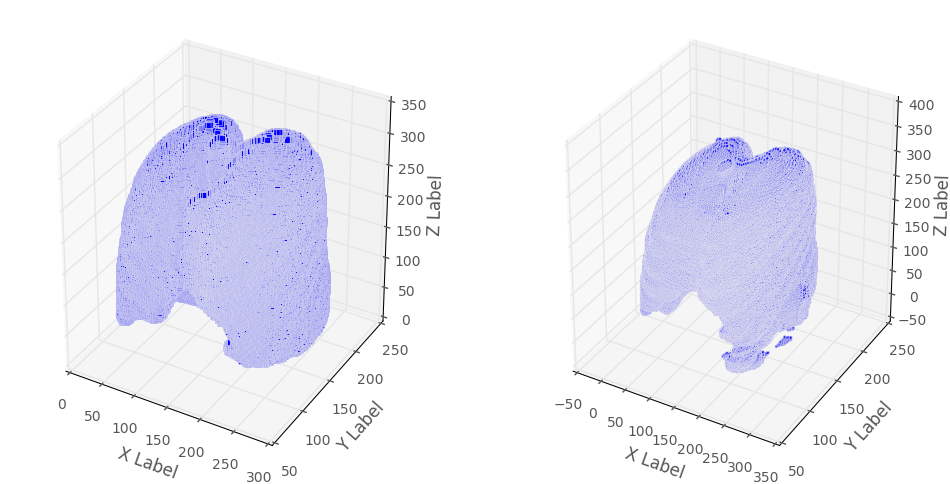

In [65]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d', axisbg='white')
ax2 = fig.add_subplot(122, projection='3d', axisbg='white')

ax.scatter(seg3dY, seg3dX, seg3dZ, c='blue', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax2.scatter(segWaterY, segWaterX, segWaterZ, c='blue', marker='.')
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

plt.show()